Análisis Exploratorio Cuantitativo
===

* 60:00 min | Última modificación: Septiembre 7, 2021 | [YouTube]

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Definición del problema 

El [conjunto de datos de la flor Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) contiene 150 muestras de las medidas del ancho y el largo del pétalo y del sépalo para las tres especies de esta flor (Iris setosa, Iris virginica e Iris versicolor). A partir de la muestra de datos se desean responder las siguientes preguntas:


* **P1**.--- ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tipos de flores?


* **P2**.--- ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?


* **P3**.--- ¿Qué relación existe entre el largo y el ancho del pétalo y el sépalo?

## Carga de datos

In [3]:
#
# Se cargan los datos y se realiza una inspección
# inicial de la tabla y los datos
#
iris_df = sns.load_dataset('iris')

display(
    iris_df.head(),
    iris_df.tail()
)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
#
# Se verifican los tipos de datos de las columnas
# y que no hayan datos nulos.
#
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## P1.--- ¿Cuál es la longitud y ancho típicos del pétalo y del sépalo para cada uno de los tipos de flores?

En esta pregunta se esta pidiendo una medida o estimación de localización del valor típico de la longitud del pétalo. Existen varias medidas.

**Media o promedio muestral:**

Valor "típico" de los datos.

$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$

In [9]:
#
# Cálculo para una variable
#
from statistics import mean

display(
    iris_df.sepal_length.mean(),
    mean(iris_df.sepal_length),
    np.mean(iris_df.sepal_length)
)

5.843333333333334

5.843333333333334

5.843333333333334

In [11]:
#
# Cálculo para las columnas numéricas del
# dataframe
#
iris_df.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [12]:
#
# Cálculo de la media de cada columna por especie
#
iris_df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


**Media ponderada:** 

$$\bar{x} = \frac{1}{\sum_{i=1}^n w_i} \sum_{i=1}^n w_i x_i$$

**Outlier o valor atípico:** 

Valores extremadamente distantes del resto de los datos. En algunos casos se pueden definir en términos de la media y la desviación estándar de la muestra; por ejemplo, se considera outliers aquellas observaciones distantes más de 3.5$\sigma$ de la media. 

**Media truncada:** 

Se calcula la media sobre los datos después de eliminar los $p$ datos más pequeños y los $p$ datos más grandes. Si $x_{(1)}$, $x_{2}$, ..., $x_{(n)}$ representan los datos ordenados, donde $x_{(1)}$ es el dato más pequeño y $x_{(n)}$ el más grande, entonces la media truncada se calcula como:

$$\frac{1}{n-2p} \sum_{i=1+p}^{n-p} x_i$$

**Mediana:** 

Es el valor $x_{((n+1)/2)}$ cuando se ordenan los datos. Es una aproximación robusta (no influenciada por datos atípicos o distribuciones asimétricas.

In [13]:
#
# Cálculo para una variable
#
from statistics import median

display(
    iris_df.sepal_length.median(),
    median(iris_df.sepal_length),
    np.median(iris_df.sepal_length),
)

5.8

5.8

5.8

In [14]:
#
# Cálculo para las columnas del dataframe
#
iris_df.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [15]:
#
# Cálculo discriminando por especie
#
iris_df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


**Moda:**

In [16]:
#
# Cálculo para una variable
#
from statistics import mode
from scipy import stats

display(
    iris_df.sepal_length.mode(),
    mode(iris_df.sepal_length),
    stats.mode(iris_df.sepal_length),
)

0    5.0
dtype: float64

5.0

ModeResult(mode=array([5.]), count=array([10]))

In [18]:
#
# Cálculo para las columnas del dataframe
#
iris_df.mode()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


## P2.--- ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

Esta pregunta se refiere a una medida de la dispersión o variabilildad de los datos y a como se distribuyen.

**Desviación:** 

Diferencia entre el valor observado y el valor estimado de localización. En modelado sus sinónimos son errores o residuales.

**Rango:** 

Diferencia entre el valor más grande y más pequeño de la muestra de los datos.

**Varianza muestral:**

$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$

In [24]:
#
# Cálculo para una variable
#
from statistics import variance

display(
    iris_df.sepal_length.var(),
    variance(iris_df.sepal_length),
    np.var(iris_df.sepal_length),
)

0.6856935123042507

0.6856935123042506

0.6811222222222223

In [25]:
#
# Cálculo para las columnas del dataframe
#
iris_df.var()

sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

In [26]:
#
# Cálculo por especie
#
iris_df.groupby('species').var()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


**Desviación estándar muestral**.

Raíz cuadrada de la varianza muestral.

In [27]:
#
# Cálculo para una variable
#
from statistics import stdev

display(
    iris_df.sepal_length.std(),
    stdev(iris_df.sepal_length),
    np.std(iris_df.sepal_length),
)

0.828066127977863

0.8280661279778629

0.8253012917851409

In [28]:
#
# Cálculo para las columnas del dataframe
#
iris_df.std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [29]:
#
# Cálculo por especie
#
iris_df.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


**Desviación media absoluta (MAD):**

Norma L1 o distancia de Manhattan.

$$\text{MAD} = \frac{1}{n} \sum_{i=1}^n |x_i - \bar{x}|$$

In [30]:
#
# Cálculo para una variable
#
from scipy.stats import median_absolute_deviation

display(
    iris_df.sepal_length.mad(),
    median_absolute_deviation(iris_df.sepal_length)
)

0.6875555555555557

1.0378200000000002

In [31]:
#
# Cálculo para las columnas del dataframe
#
iris_df.mad()

sepal_length    0.687556
sepal_width     0.336782
petal_length    1.562747
petal_width     0.658133
dtype: float64

In [32]:
#
# Cálculo por especie
#
iris_df.groupby('species').mad()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.27072,0.28736,0.13152,0.08256
versicolor,0.42144,0.25480,0.37920,0.15712
virginica,0.50256,0.24216,0.44000,0.22808


**Desviación absoluta de la mediana:** 

Ya que la varianza y la desviación media absoluta no son robusta a outliers, se puede realizar un estimado de la desviación usando la mediana $m$ de la muestra:

$$\text{Mediana}(|x_1 - m|,\; |x_2 - m|,\;...,\;|x_n - m|)$$ 


También es posible computar la varianza muestral truncada en analogía a la media truncada.

In [34]:
def madm(df):
    d = df._get_numeric_data().copy()
    m = d.median()
    for c in d.columns:
        d[c] = d[c] - m[c]
    return d.mad()


madm(iris_df)

sepal_length    0.687556
sepal_width     0.336782
petal_length    1.562747
petal_width     0.658133
dtype: float64

In [36]:
#
# Cálculo por especie
#
def madm(x):
    m = x.median()
    x = x - m
    x = x.abs()
    return x.mean()
    

iris_df.groupby('species').agg(madm)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.270,0.284,0.130,0.066
versicolor,0.420,0.250,0.376,0.154
virginica,0.492,0.238,0.440,0.226


**Estadísticos de orden:** Métricas calculadas sobre los datos ordenados.

* **Percentil** $p$: Valor para el cual el $p$ por ciento de los datos son menores o iguales. 

* **decil** $d$: Valor para el cual el $d$ por ciento de los datos son menores o iguales. $d$ es un múltiplo de 10.

* **Cuartil inferior:** Valor para el cual el 25% de las observaciones son más pequeñas (percentil del 25%).

* **Cuartil superior:** Valor para el cual el 25% de las observaciones son más grandes (percentil del 75%).

* **Rango intercuartil (IQR):**

$$\text{IQR} = \text{Cuartil superior} - \text{Cuartil inferior}$$

In [37]:
#
# Cálculo de cuartiles
#
display(
    iris_df.quantile(0.25),
    iris_df.quantile(0.75)
)

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64

sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64

In [38]:
iris_df.groupby("species").quantile(0.25)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.800,3.200,1.4,0.2
versicolor,5.600,2.525,4.0,1.2
virginica,6.225,2.800,5.1,1.8


In [39]:
iris_df.groupby("species").quantile(0.75)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.2,3.675,1.575,0.3
versicolor,6.3,3.000,4.600,1.5
virginica,6.9,3.175,5.875,2.3


In [40]:
iris_df.groupby("species").quantile(0.75)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.2,3.675,1.575,0.3
versicolor,6.3,3.000,4.600,1.5
virginica,6.9,3.175,5.875,2.3


In [41]:
iris_df.groupby("species").quantile(0.75) - iris_df.groupby("species").quantile(0.25)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.400,0.475,0.175,0.1
versicolor,0.700,0.475,0.600,0.3
virginica,0.675,0.375,0.775,0.5


In [46]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
for column in iris_df._get_numeric_data().columns:
    print(column)
    print(iris_df.groupby("species")[column].describe())
    print("")

sepal_length
            count   mean       std  min    25%  50%  75%  max
species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

sepal_width
            count   mean       std  min    25%  50%    75%  max
species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

petal_length
            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

petal_width
  

In [ ]:
#
# El método describe de pandas computa los 
# principales estadísticos para las columnas
# numéricas del dataframe
#
data.Sepal_Length.describe()

In [ ]:
descriptive_stats = data.Sepal_Length.describe()

q75 = data.Sepal_Length.describe()['75%']
q25 = data.Sepal_Length.describe()['25%']
iqr = q75 - q25

upper_outliers = q75 + 1.5 * iqr
lower_outliers = q25 - 1.5 * iqr

sns.set(color_codes=True)

sns.kdeplot(data['Sepal_Length'], shade=True)
plt.axvline(data.Sepal_Length.mean())
plt.axvline(data.Sepal_Length.median(), color='r')
plt.axvline(q25, color='g')
plt.axvline(q75, color='g')
plt.axvline(upper_outliers, color = 'b')
plt.axvline(lower_outliers, color = 'b')
plt.show()

**Medidas de forma**

In [ ]:
from scipy.stats import skew

display(
    data.Sepal_Length.skew(),
    skew(data.Sepal_Length),
)

In [ ]:
from scipy.stats import kurtosis

display(
    data.Sepal_Length.kurt(),
    kurtosis(data.Sepal_Length),
)

## P3.--- ¿Qué relación existe entre el largo y el ancho del pétalo y el sépalo?

**Covarianza**

In [3]:
np.cov(tips.total_bill, tips.tip)

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [4]:
tips.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


**Coeficiente de correlación:** Métrica que representa la dependencia entre una variable y otra. El coeficiente de correlación de Pearson $r$ entre dos variables $x$ y $y$ se calcula como:

$$r=\frac{\sum_{i=1}^n  (x_i - \bar{x}) (y_i - \bar{y})}
         {(n-1)\; s_X \; s_Y}$$


La correlación va entre $-1$ (correlación perfecta negativa) y $+1$ (correlación perfecta positiva). Un valor de $0$ indica que no hay correlación.

In [5]:
np.corrcoef(tips.total_bill, tips.tip)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

**Matriz de correlación:** Matriz donde cada fila y cada columna corresponde a una variable, y los elementos corresponden a la correlación entre las respectivas variables.

In [39]:
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


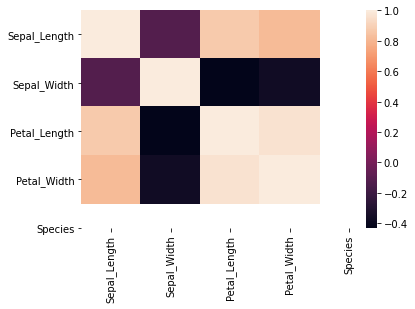

In [40]:
sns.heatmap(df.corr(), xticklabels=df.columns.values, yticklabels=df.columns.values);